In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import h5py
import numpy as np
import matplotlib.pyplot as plt

import os, sys
from copy import copy as copy
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

from params.N2O import data_parameters

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.ion()

In [13]:
N = "70000"
fName = "../../../output/N2O/log_probabilities-"+N+".npy"
with open(fName, "rb") as file:
    probs = np.load(file)

fName = "../../../output/N2O/molecules-"+N+".npy"
with open(fName, "rb") as file:
    molecules = np.load(file)

fName = "../../../output/N2O/order-"+N+".npy"
with open(fName, "rb") as file:
    order = np.load(file)

probs = np.flip(probs)
molecules = np.flip(molecules, axis=0)
order = np.flip(order)

burn_in_mask = (order >= 50000)

probs = probs[burn_in_mask]
molecules = molecules[burn_in_mask]
order = order[burn_in_mask]

print(probs.shape, molecules.shape, order.shape)

(20000,) (20000, 3, 3) (20000,)


In [14]:
def calc_dists(R):
  r     = np.sqrt(np.sum((R[:,0,:] - R[:,2,:])**2, axis=-1))

  return np.concatenate([
      np.expand_dims(R[:,0,2], -1),
      np.expand_dims(np.sqrt(np.sum(R[:,2,:]**2, -1)), -1),
      np.expand_dims(r, -1)], -1)

In [15]:
molecules_centSub = molecules - molecules[:,np.array([1]),:]
R = calc_dists(molecules)
print(R.shape)
angles = np.arccos(np.maximum(np.sum(molecules_centSub[:,0,:]*molecules_centSub[:,2,:], axis=-1)/(R[:,0]*R[:,1]), -1))

cut=10
print(R[:cut])
print(angles[:cut])
print(probs[:cut])
print(order[:cut])

(20000, 3)
[[1.14905073 1.15370675 2.30056663]
 [1.15009105 1.15315032 2.30086567]
 [1.14959311 1.15292033 2.3003475 ]
 [1.14227888 1.1599054  2.30016257]
 [1.14648353 1.15655246 2.30081867]
 [1.14584592 1.15641536 2.30005065]
 [1.14168387 1.16040141 2.30005681]
 [1.13582217 1.166096   2.30020188]
 [1.13752645 1.16492504 2.30040605]
 [1.14199546 1.16017851 2.30006838]]
[3.05434331 3.05074591 3.05483628 3.05776656 3.05382221 3.05394007
 3.05762445 3.0643495  3.05727753 3.05604469]
[-0.57184089 -0.79188916 -1.30191686 -0.59284266 -1.8615055  -2.9369654
 -1.10985989 -0.05320035 -1.38094185 -1.49066989]
[69999 69998 69997 69996 69995 69994 69993 69992 69991 69990]


<IPython.core.display.Javascript object>


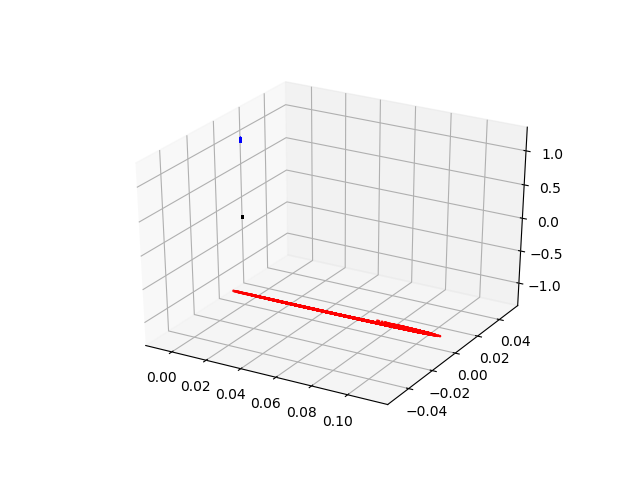

In [18]:
mplot = molecules[:,:,:]# - np.expand_dims(np.mean(molecules, axis=1), axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
size = 0.75
ax.scatter(mplot[:,0,0], mplot[:,0,1], mplot[:,0,2], color='b', s=size)
ax.scatter(mplot[:,1,0], mplot[:,1,1], mplot[:,1,2], color='k', s=size)
ax.scatter(mplot[:,2,0], mplot[:,2,1], mplot[:,2,2], color='r', s=size)
plt.show()

<IPython.core.display.Javascript object>


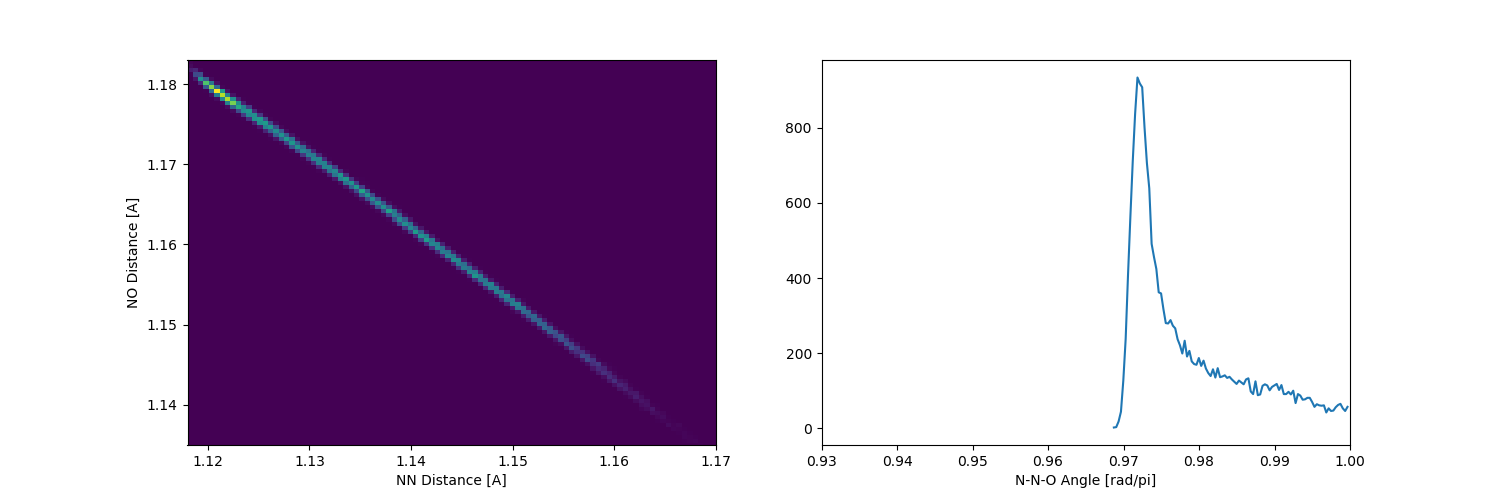

<IPython.core.display.Javascript object>


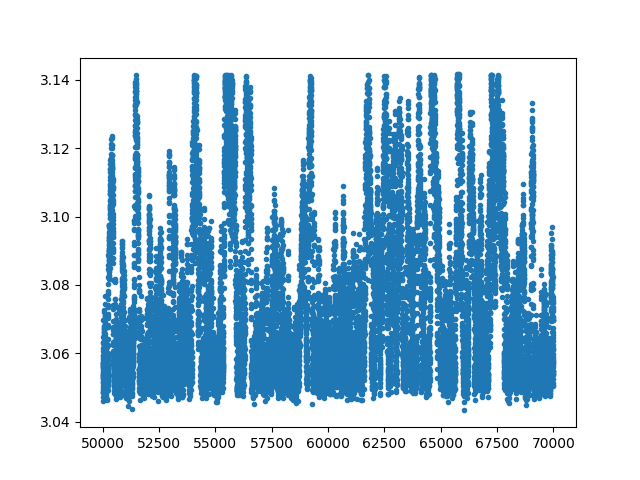

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
mask = np.ones_like(angles).astype(bool)
#mask = angles < np.pi*0.98
h, x, y, _ = ax[0].hist2d(R[mask,0], R[mask,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
ax[0].set_xlim([1.118, 1.17])
ax[0].set_ylim([1.135, 1.183])
y, x = np.histogram(angles[mask]/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

plt.figure()
plt.plot(order[mask], angles[mask], '.')

<IPython.core.display.Javascript object>


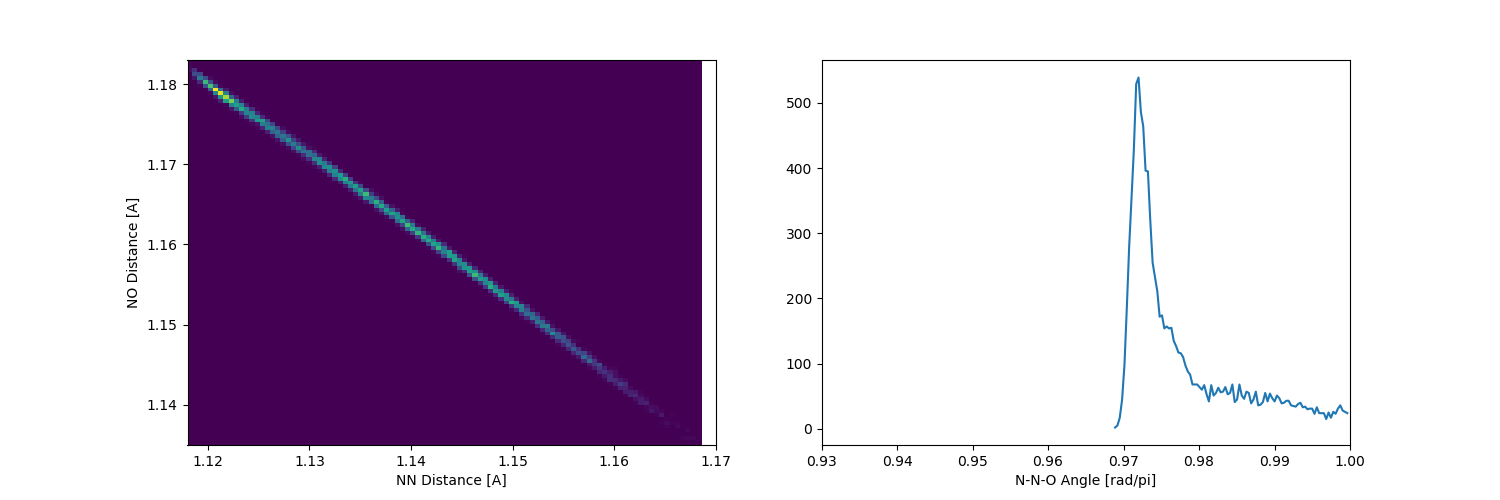

<IPython.core.display.Javascript object>


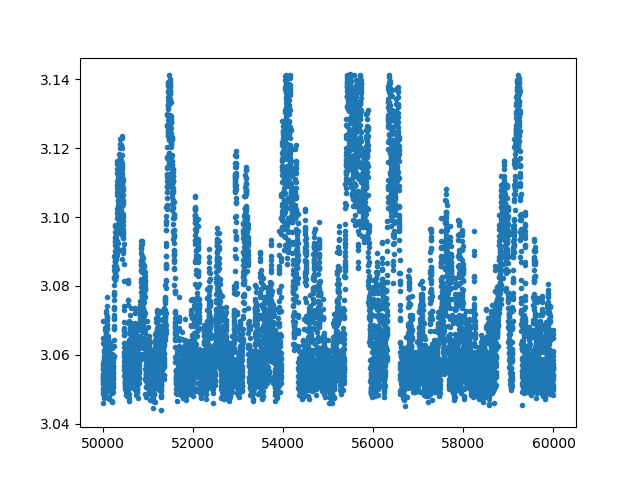

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
mask = np.ones_like(angles).astype(bool)
#mask = angles < np.pi*0.98
h, x, y, _ = ax[0].hist2d(R[mask,0], R[mask,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
ax[0].set_xlim([1.118, 1.17])
ax[0].set_ylim([1.135, 1.183])
y, x = np.histogram(angles[mask]/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

plt.figure()
plt.plot(order[mask], angles[mask], '.')

<IPython.core.display.Javascript object>


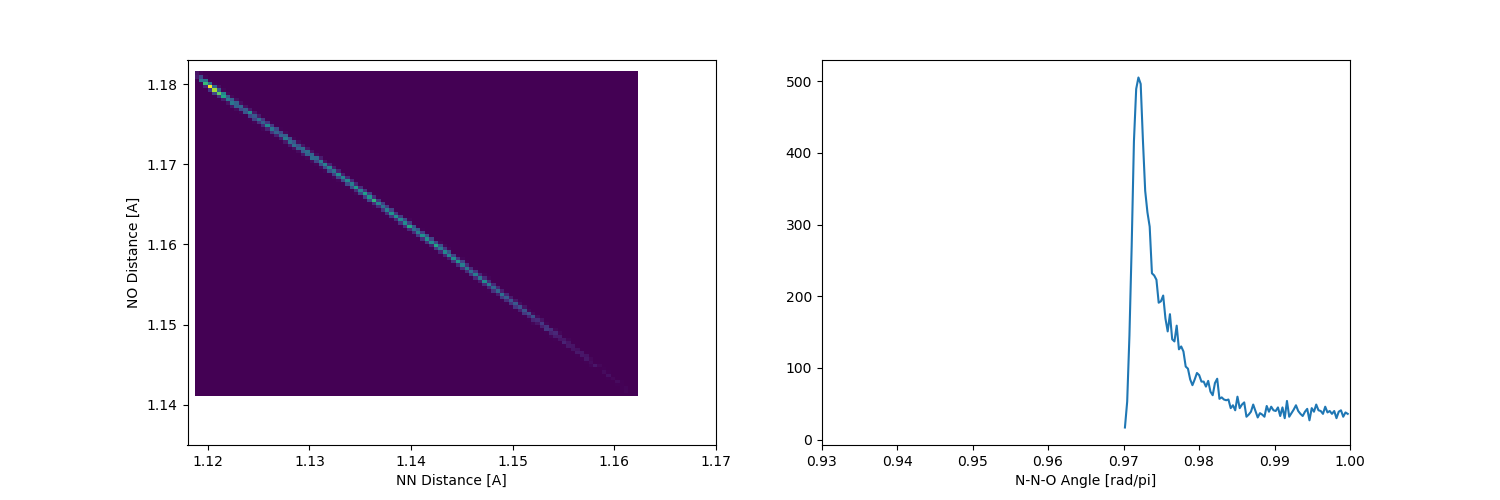

<IPython.core.display.Javascript object>


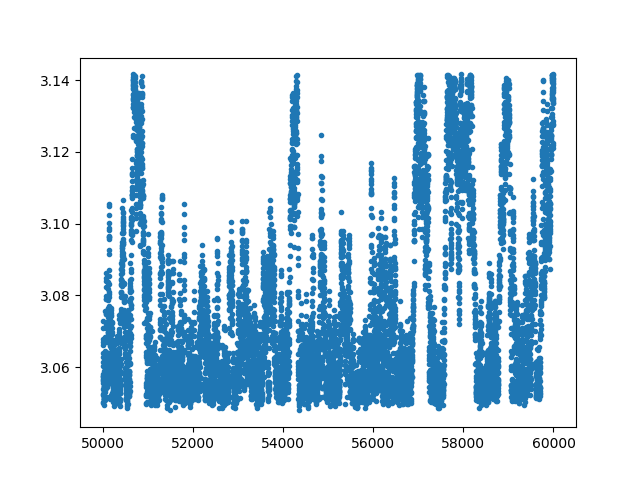

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
mask = np.ones_like(angles).astype(bool)
#mask = angles < np.pi*0.98
h, x, y, _ = ax[0].hist2d(R[mask,0], R[mask,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
ax[0].set_xlim([1.118, 1.17])
ax[0].set_ylim([1.135, 1.183])
y, x = np.histogram(angles[mask]/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

plt.figure()
plt.plot(order[mask], angles[mask], '.')

## 3 - 8

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/deeplearning3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


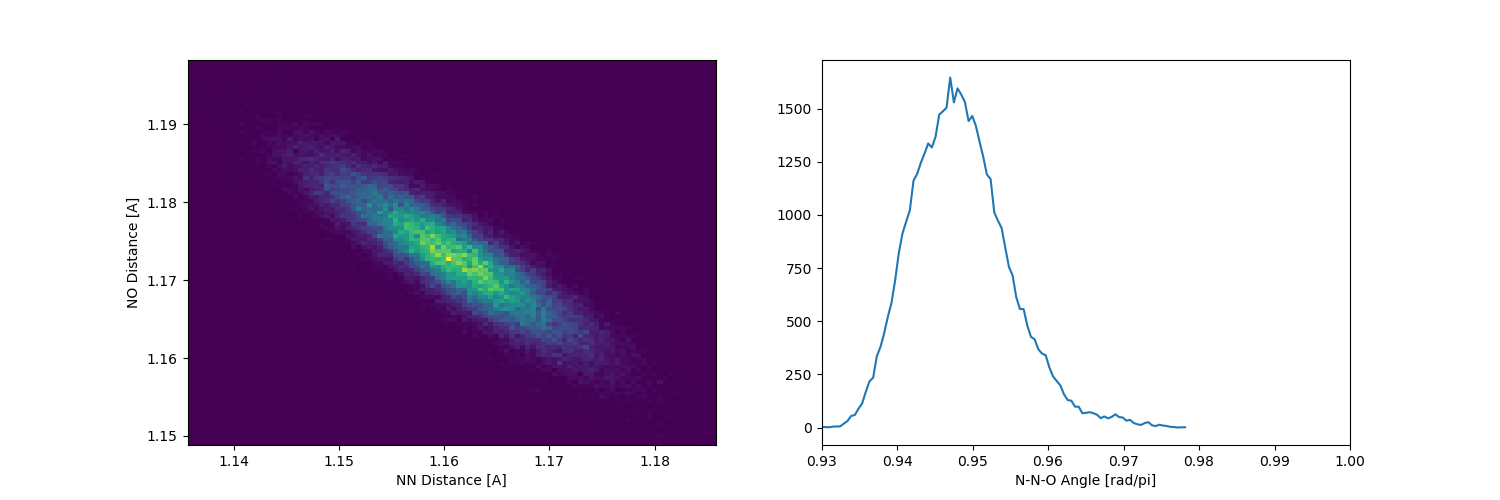

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [295]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/deeplearning3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


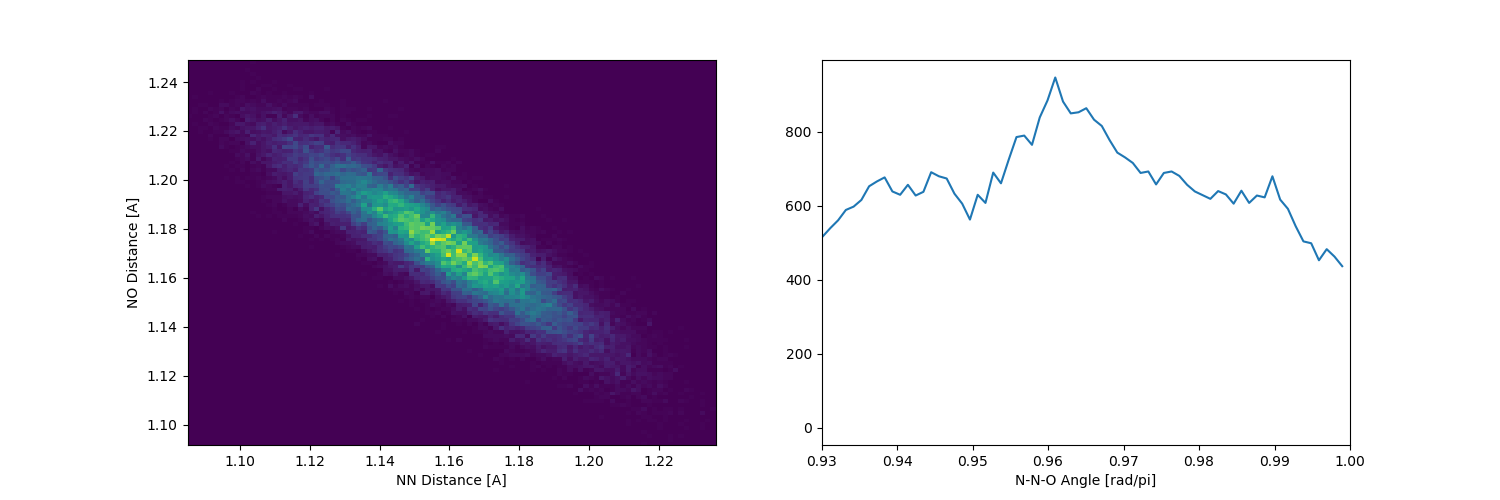

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [347]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

## 3 - 7.5

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/deeplearning3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


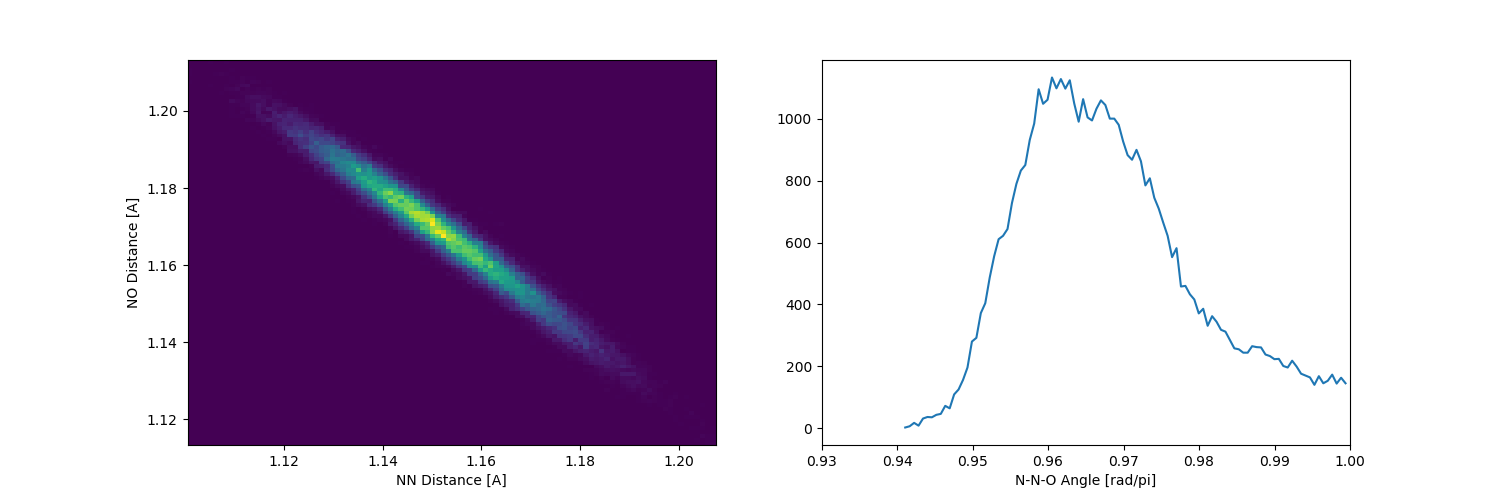

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [299]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/deeplearning3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


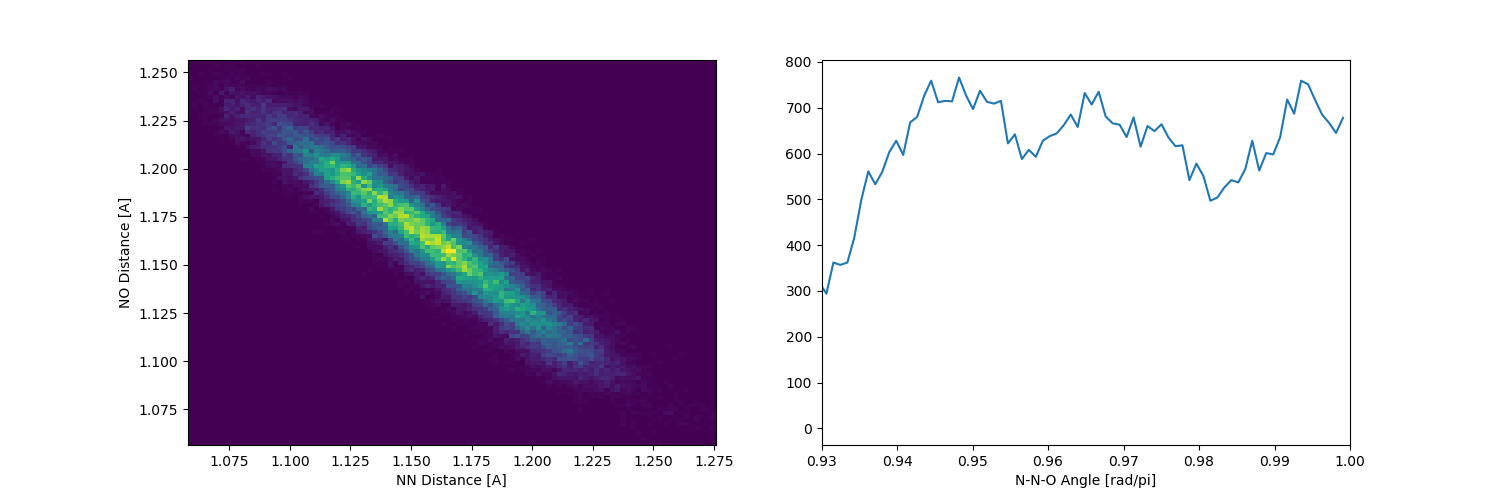

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [343]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

## 3 - 7

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/deeplearning3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


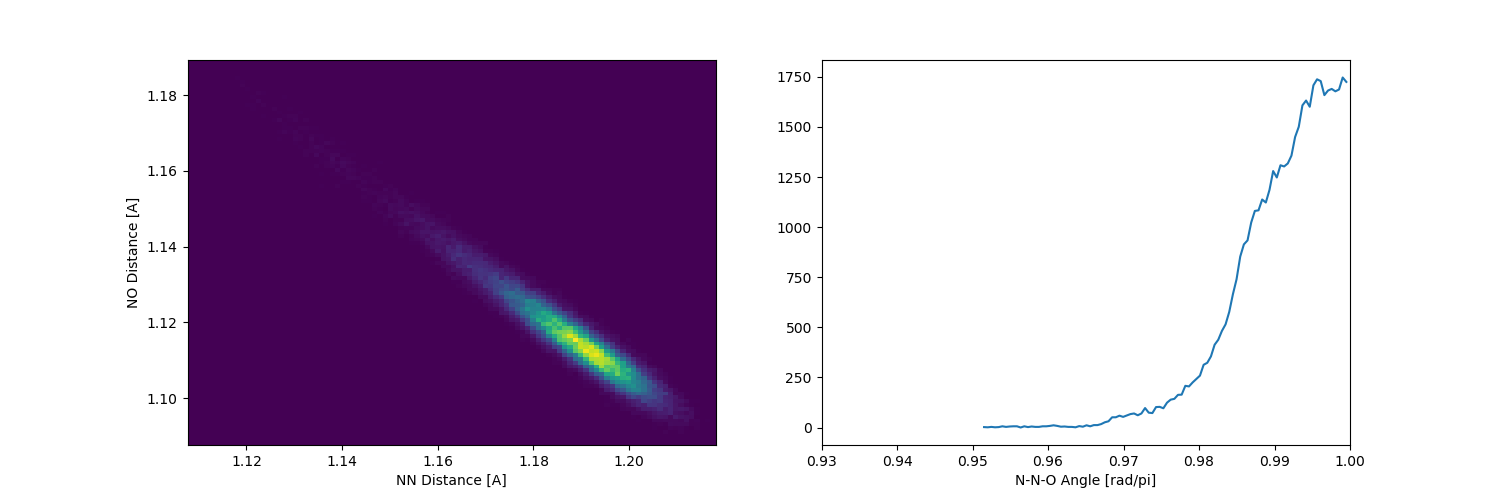

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [303]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

<IPython.core.display.Javascript object>


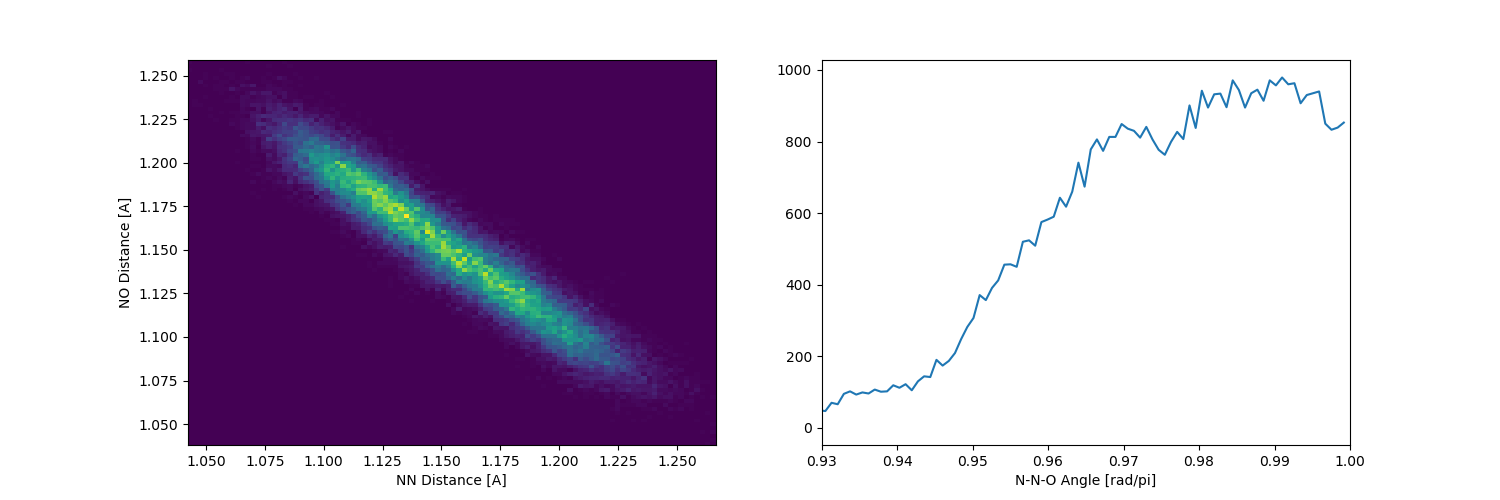

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [339]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

## 3 - 6.5

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/deeplearning3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


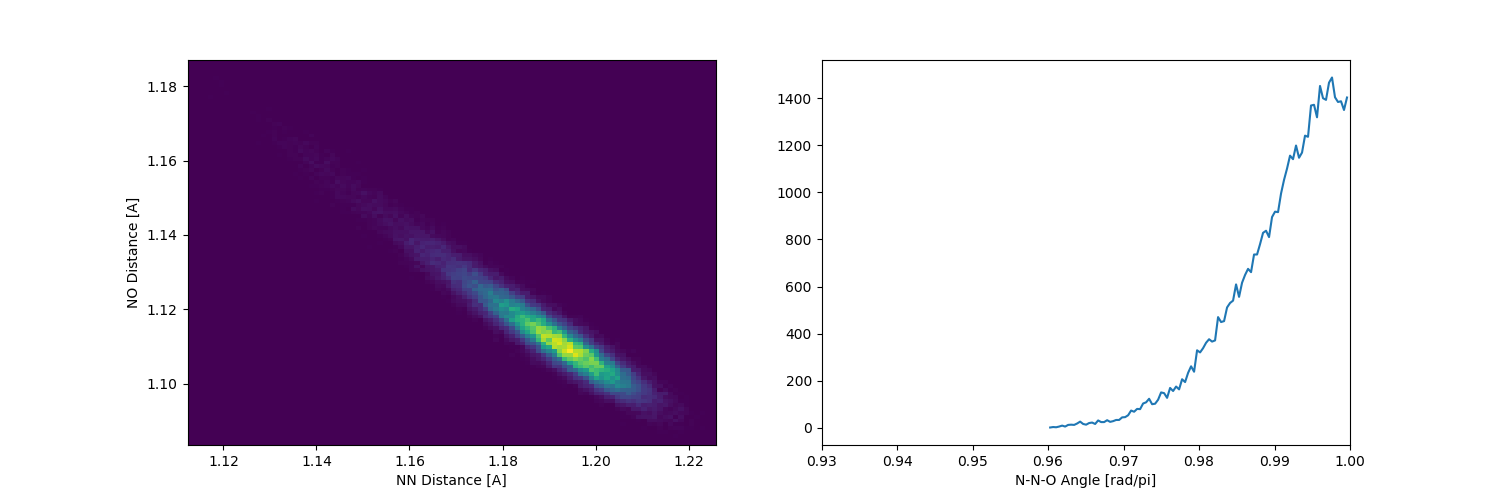

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [308]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

<IPython.core.display.Javascript object>


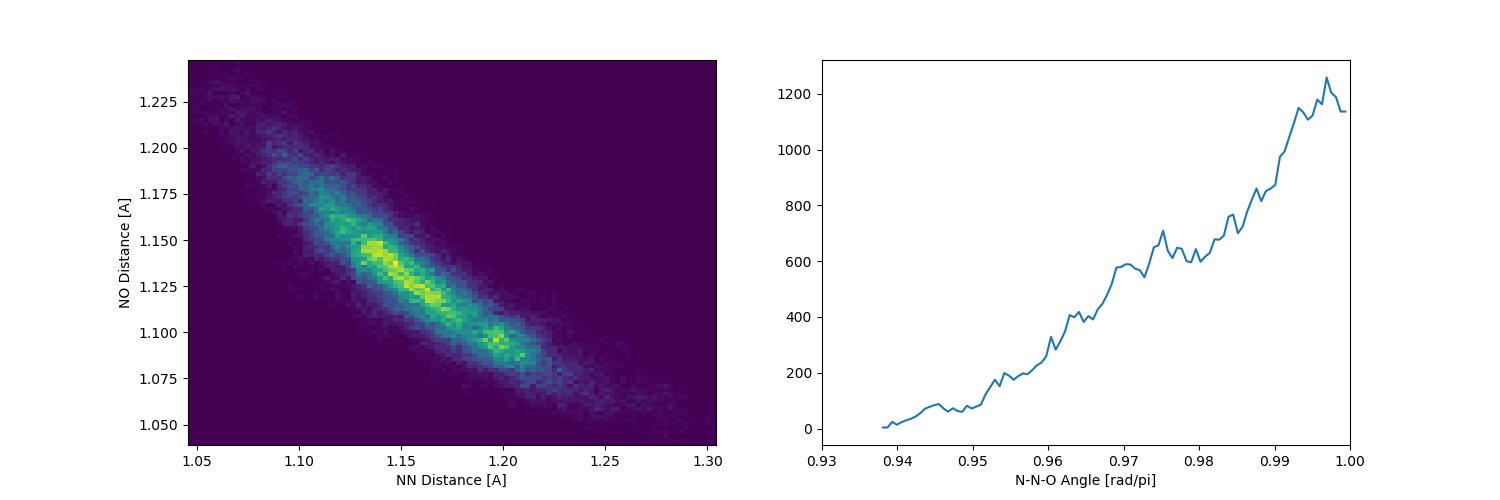

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [331]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

# 3 - 6

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/deeplearning3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


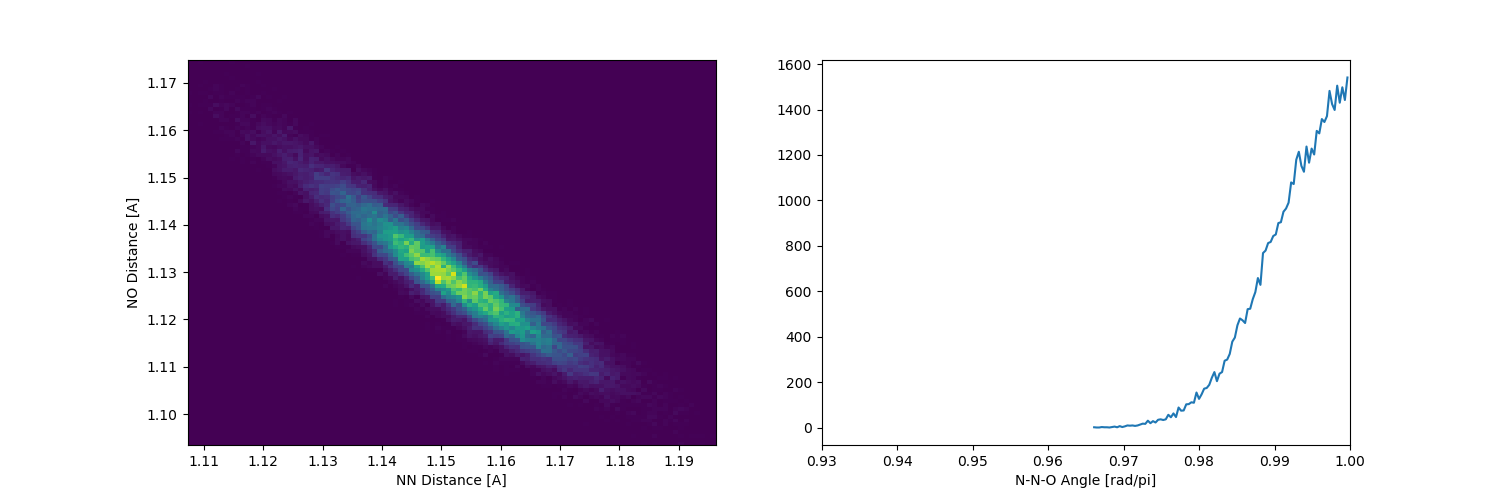

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [321]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

<IPython.core.display.Javascript object>


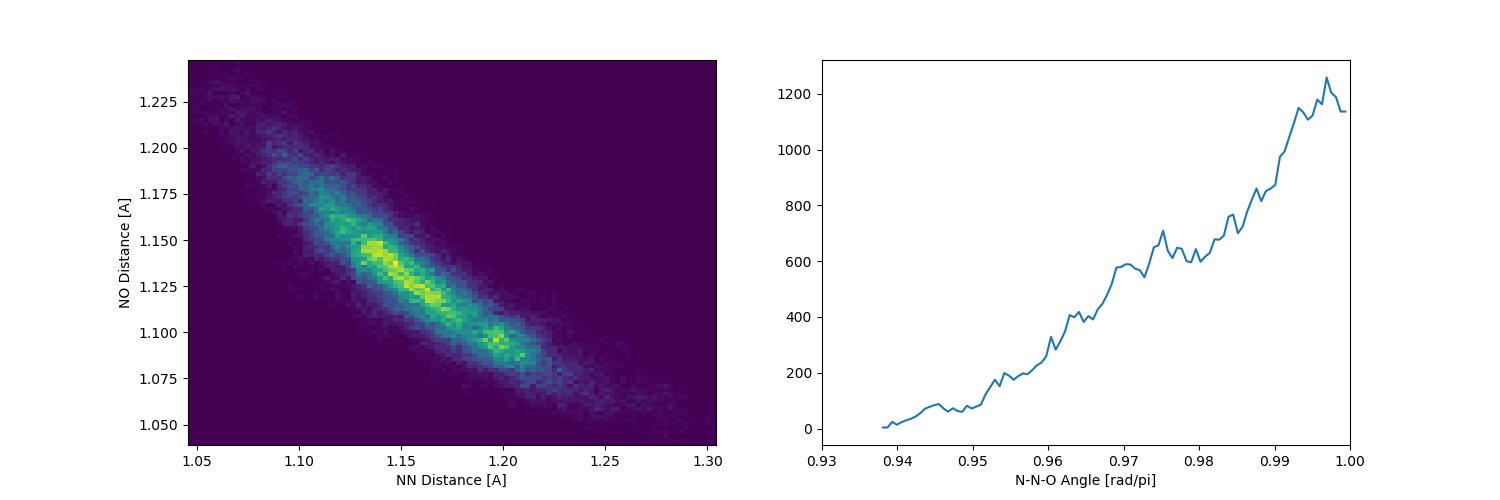

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [330]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

# 3 - 5

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/deeplearning3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


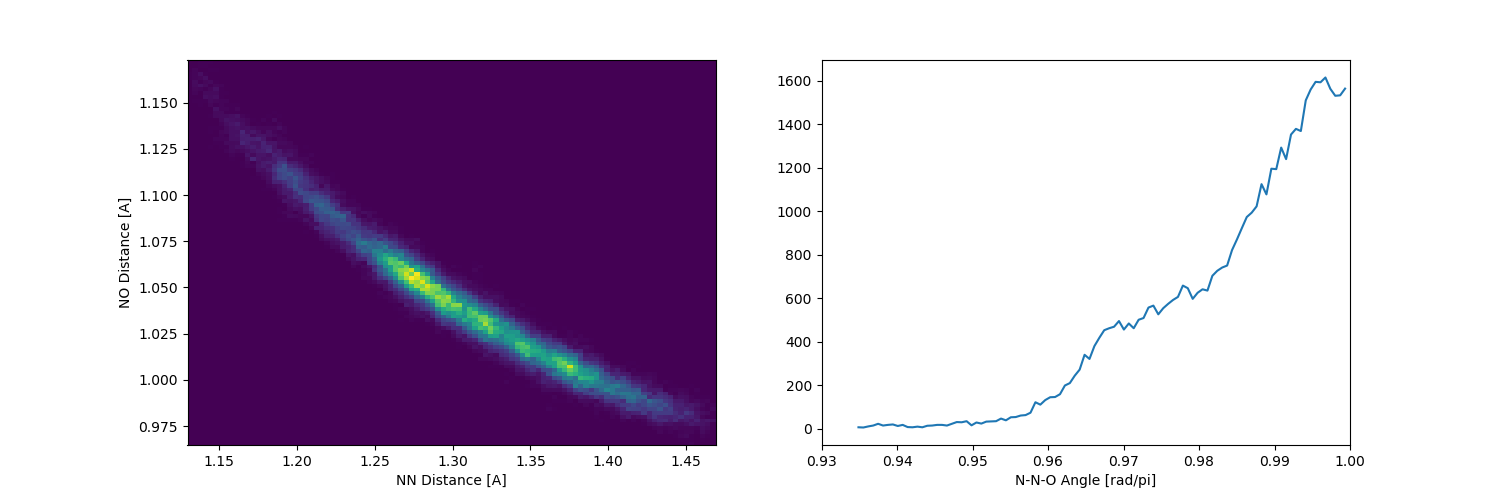

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [317]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

<IPython.core.display.Javascript object>


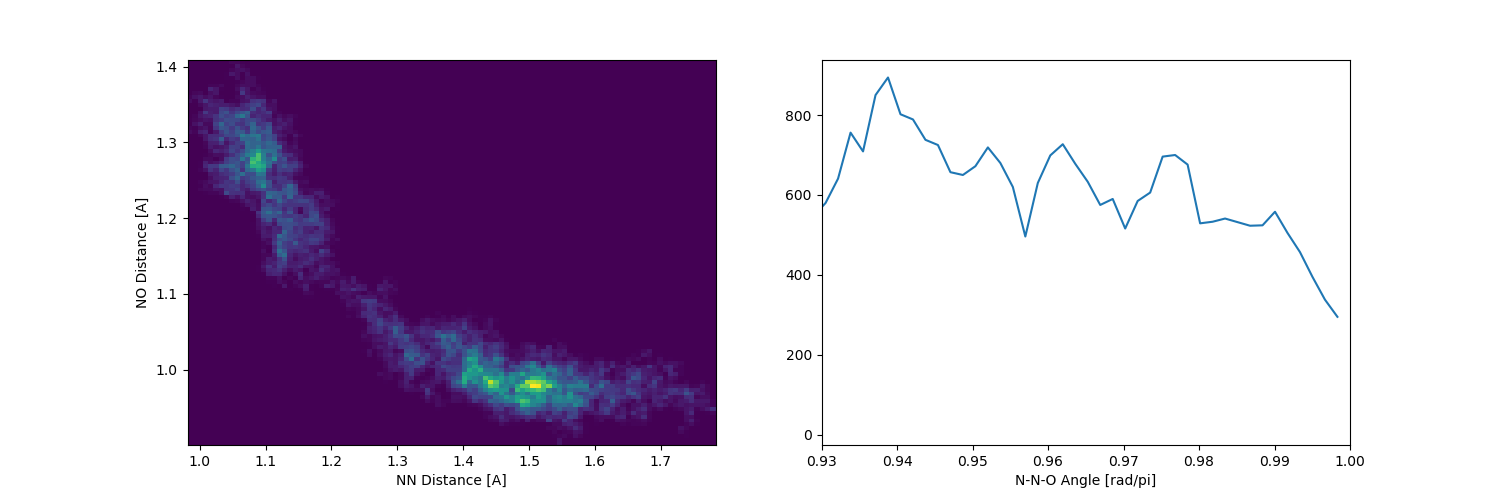

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [325]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
h, x, y, _ = ax[0].hist2d(R[:,0], R[:,1], bins=[100, 100])
ax[0].set_xlabel("NN Distance [A]")
ax[0].set_ylabel("NO Distance [A]")
y, x = np.histogram(angles/np.pi, bins=100)
ax[1].plot(x[:-1], y)
ax[1].set_xlim([0.93,1])
ax[1].set_xlabel("N-N-O Angle [rad/pi]")

<IPython.core.display.Javascript object>


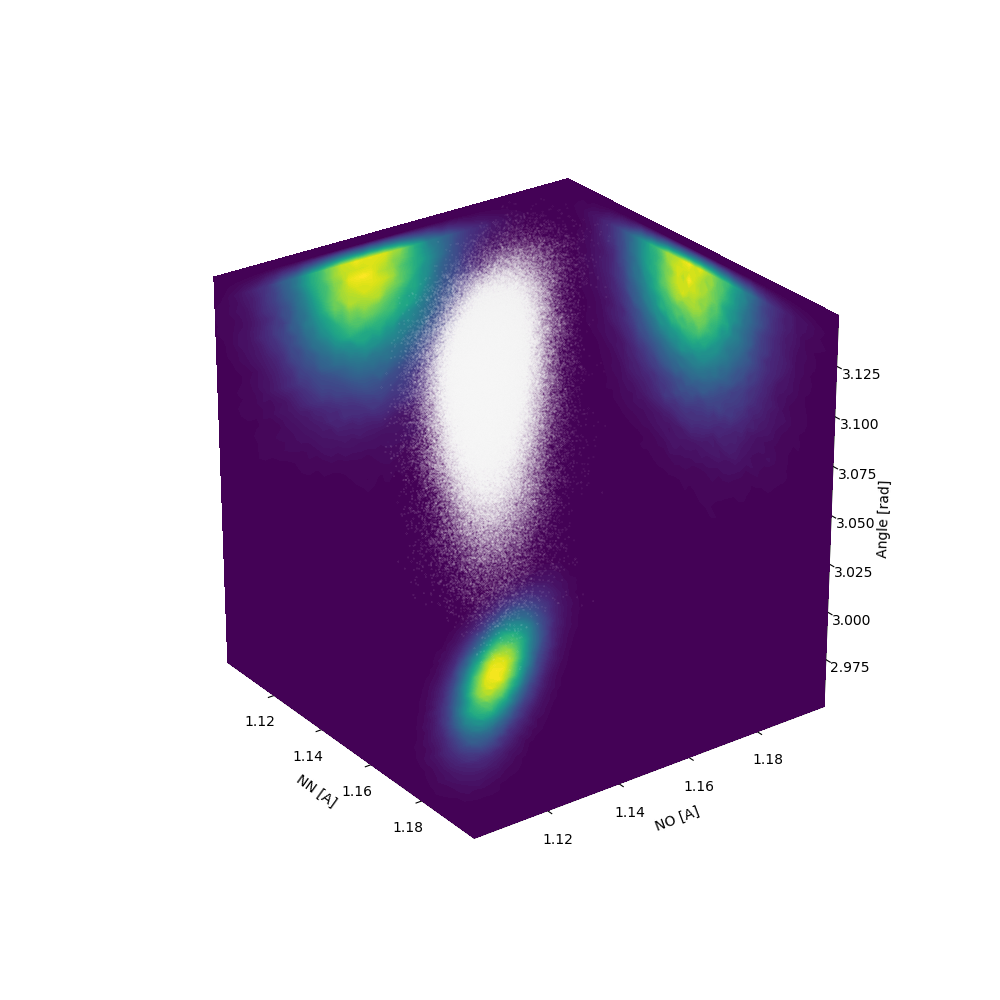

(50, 50) (50, 50) (50, 50) (51,) (51,)


(2.954, 3.146)

In [178]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

xm, xM = 1.1, 1.2
ym, yM = 1.1, 1.2
zm, zM = 2.95, 3.15
Nhbins = 50
Nlevels = 100

size=0.005
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
X,Y,Z = R[:,0], R[:,1], angles[:]

xdt = (xM-xm)/Nhbins
xEdges = np.linspace(xm, xM+xdt, num=Nhbins+1) - xdt/2.
x = np.linspace(xm, xM, num=Nhbins)
ydt = (yM-ym)/Nhbins
yEdges = np.linspace(ym, yM+ydt, Nhbins+1) - ydt/2.
y = np.linspace(ym, yM, Nhbins)
zdt = (zM-zm)/Nhbins
zEdges = np.linspace(zm, zM+zdt, Nhbins+1) - zdt/2.
z = np.linspace(zm, zM, Nhbins)

ax.scatter(X,Y,Z, color='w', s=size)

Zhist,_,_ = np.histogram2d(X,Y, [xEdges, yEdges])
xp,yp = np.meshgrid(x,y)
print(Zhist.shape, xp.shape, yp.shape, xEdges.shape, yEdges.shape)
cset = ax.contourf(xp, yp, Zhist, zdir='z', offset=zm, levels=Nlevels, cmap=cm.viridis)

Xhist,_,_ = np.histogram2d(Y,Z, [yEdges, zEdges])
yp,zp = np.meshgrid(y,z)
zp,yp = np.meshgrid(z,y)
cset = ax.contourf(Xhist, yp, zp, zdir='x', offset=xm, levels=Nlevels, cmap=cm.viridis)

Yhist,_,_ = np.histogram2d(X,Z, [xEdges, zEdges])
zp,xp = np.meshgrid(z,x)
cset = ax.contourf(xp, Yhist, zp, zdir='y', offset=yM, levels=Nlevels, cmap=cm.viridis)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel("NN [A]")
ax.set_xlim([xm+xdt, xM-xdt])
ax.set_ylabel("NO [A]")
ax.set_ylim([ym+ydt, yM-ydt])
ax.set_zlabel("Angle [rad]")
ax.set_zlim([zm+zdt, zM-zdt])

<IPython.core.display.Javascript object>


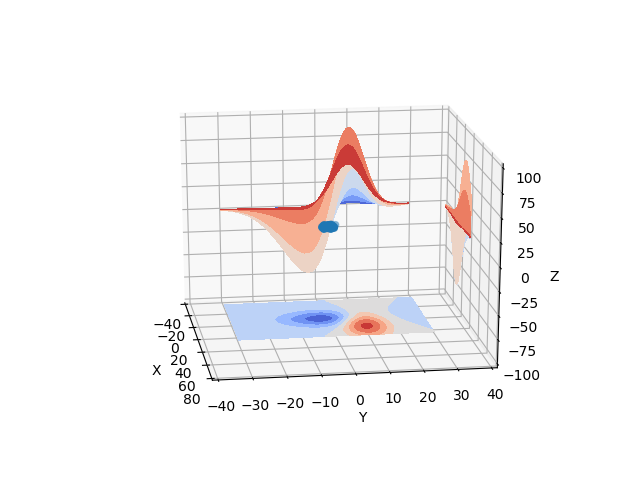

(120, 120) (120, 120) (120, 120)


<IPython.core.display.Javascript object>


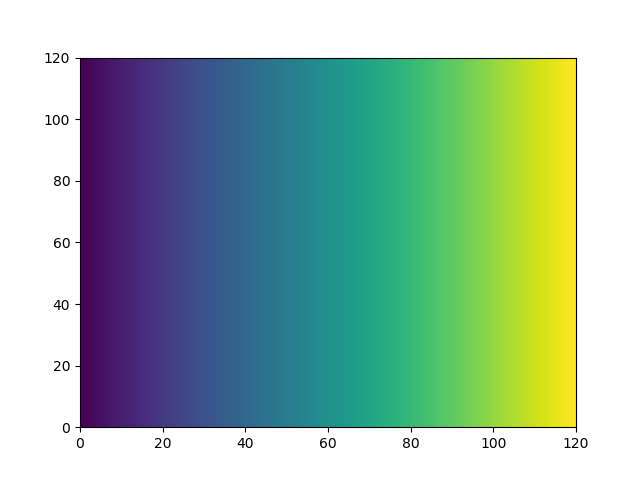

<IPython.core.display.Javascript object>


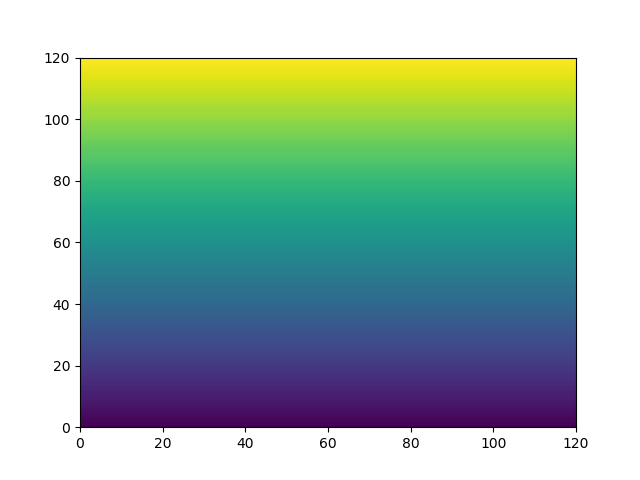

<IPython.core.display.Javascript object>


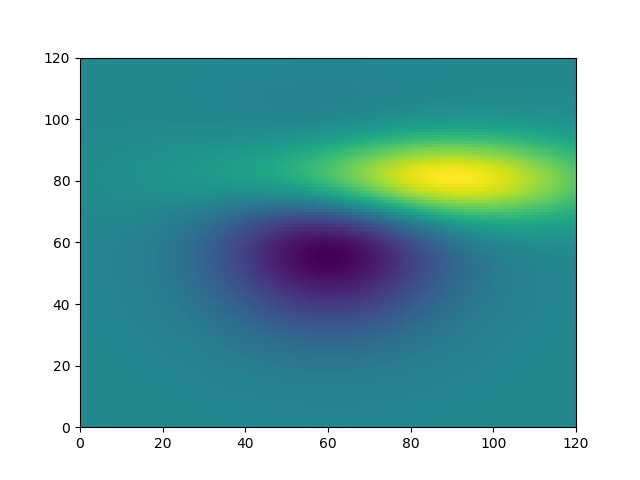

In [115]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.random import normal

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
print(X.shape, Y.shape, Z.shape)
ax.scatter(normal(size=100), normal(size=100), normal(size=100))#plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 80)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()
plt.figure()
plt.pcolormesh(X)
plt.figure()
plt.pcolormesh(Y)
plt.figure()
plt.pcolormesh(Z)

<IPython.core.display.Javascript object>


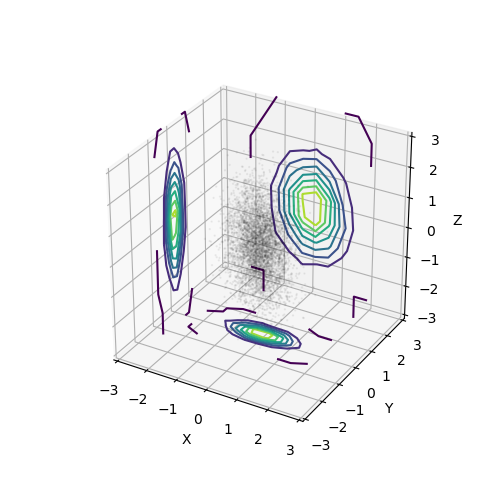

(-3, 3)

In [137]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Prepare sample data - normally distributed
NSamples = 5000
vmin, vmax = -2, 2

X = np.random.normal(loc=-.1, scale=.5, size=(NSamples,))
Y = np.random.normal(loc=.1, scale=.25, size=(NSamples,))
Z = np.random.normal(loc=0, scale=1, size=(NSamples,))

# Create figure, add subplot with 3d projection
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
ax.set_zlim(vmin, vmax)

# Plot the data cloud
ax.scatter(X, Y, Z, s=.5, alpha=.05, color='k')

hist, binx, biny = np.histogram2d( X, Y)
x = np.linspace(X.min(), X.max(), hist.shape[0])
y = np.linspace(Y.min(), Y.max(), hist.shape[1])
x, y = np.meshgrid(x, y)
ax.contour(x, y, hist, zdir='z', offset=-3.)

hist, binx, biny = np.histogram2d( X, Z)
x = np.linspace(X.min(), X.max(), hist.shape[0])
z = np.linspace(Z.min(), Z.max(), hist.shape[1])
x, z = np.meshgrid(x, z)
ax.contour(x, hist, z, zdir='y', offset=3)

hist, binx, biny = np.histogram2d( Y, Z)
y = np.linspace(Y.min(), Y.max(), hist.shape[0])
z = np.linspace(Z.min(), Z.max(), hist.shape[1])
z, y = np.meshgrid(z, y)
ax.contour(hist, y, z, zdir='x', offset=-3)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

In [ ]:
# 3-6

<IPython.core.display.Javascript object>


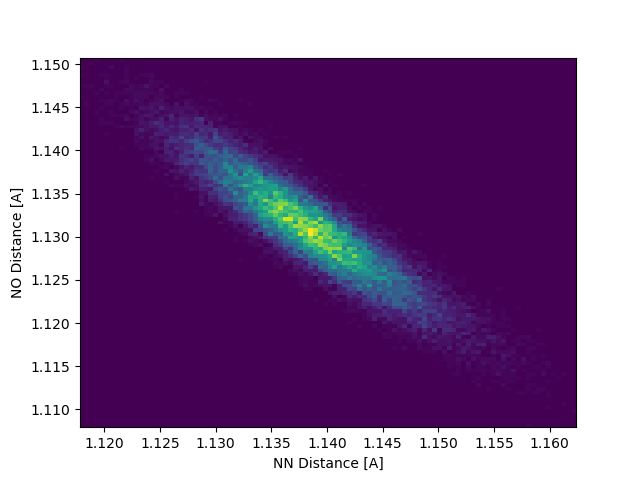

Text(0, 0.5, 'NO Distance [A]')

In [60]:
fig, ax = plt.subplots()
h, x, y, _ = ax.hist2d(R[:,0], R[:,1], bins=[100, 100])
ax.set_xlabel("NN Distance [A]")
ax.set_ylabel("NO Distance [A]")

<IPython.core.display.Javascript object>


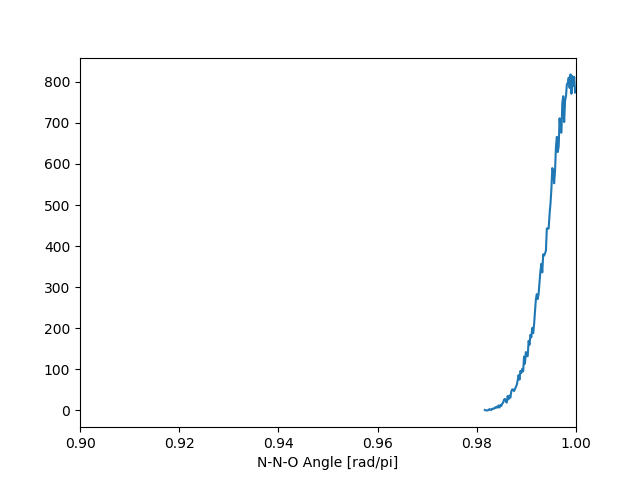

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [61]:
fig, ax = plt.subplots()
y, x = np.histogram(angles/np.pi, bins=100)
ax.plot(x[:-1], y)
ax.set_xlim([0.90,1])
ax.set_xlabel("N-N-O Angle [rad/pi]")
#print(np.sin(np.pi*x[:-1]))

In [ ]:
# 3-8

<IPython.core.display.Javascript object>


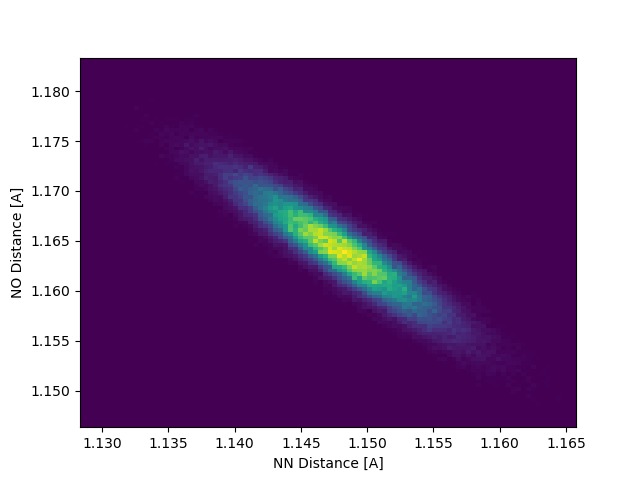

Text(0, 0.5, 'NO Distance [A]')

In [37]:
fig, ax = plt.subplots()
h, x, y, _ = ax.hist2d(R[:,0], R[:,1], bins=[100, 100])
ax.set_xlabel("NN Distance [A]")
ax.set_ylabel("NO Distance [A]")

<IPython.core.display.Javascript object>


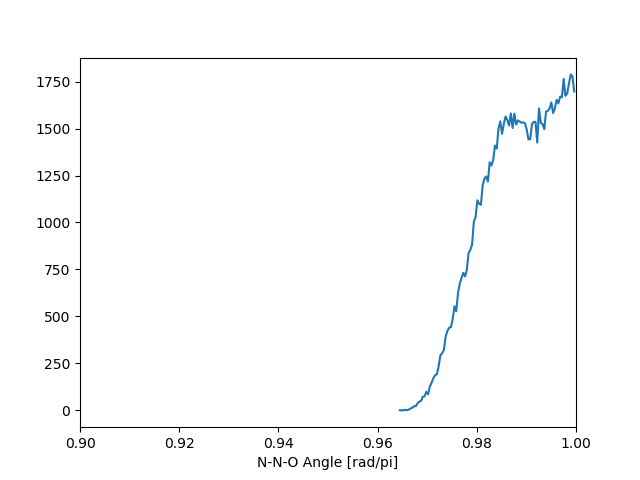

Text(0.5, 0, 'N-N-O Angle [rad/pi]')

In [38]:
fig, ax = plt.subplots()
y, x = np.histogram(angles/np.pi, bins=100)
ax.plot(x[:-1], y)
ax.set_xlim([0.90,1])
ax.set_xlabel("N-N-O Angle [rad/pi]")
#print(np.sin(np.pi*x[:-1]))

<IPython.core.display.Javascript object>


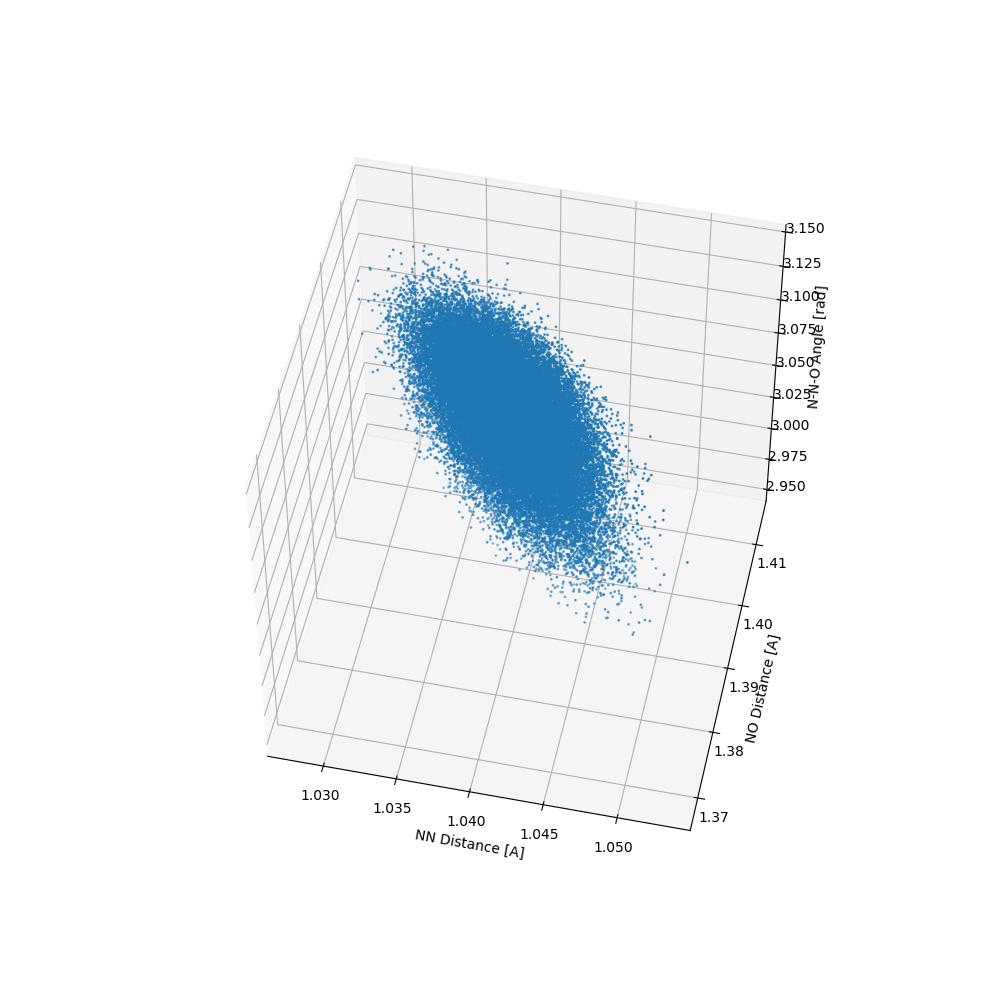

Text(0.5, 0, 'N-N-O Angle [rad]')

In [12]:
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
size = 1
inds = np.arange(molecules.shape[0])[:500]
ax.scatter(R[:,0], R[:,1], angles[:], s=size)
#ax.contour(R[:,1,0,0], R[:,1,2,0], angles[:], zdir='z')
#_ = ax.hist2d(R[:,1,0,0], R[:,1,2,0], bins=[50, 50], zdir='z')
#ax.contour(R[:,1,0,0], R[:,1,2,0], angles[:], zdir='z')
ax.set_xlabel("NN Distance [A]")
ax.set_ylabel("NO Distance [A]")
ax.set_zlabel("N-N-O Angle [rad]")

In [186]:
def calc_dists(R):
  r     = np.expand_dims(R, 1) - np.expand_dims(R, 0)
  dR    = np.sqrt(np.sum(r**2, axis=-1))
  theta = np.arccos(r[:,:,2]/(dR + 1e-20))
  phi   = np.arctan2(r[:,:,1], r[:,:,0])

  return np.concatenate([np.expand_dims(dR,-1),\
    np.expand_dims(theta, -1),\
    np.expand_dims(phi, -1)], axis=-1)


class density_extraction:

  def __init__(self, data_params, qScale):
    self.data_params = data_params
    self.atom_names = {
      "H" : "hydrogen",
      "C" : "carbon",
      "O" : "oxygen",
      "N" : "nitrogen",
      "I" : "iodine"
    }
    self.qScale = qScale

    # De Broglie wavelength angs
    self.C_AU = 1./0.0072973525664
    self.eV_to_au = 0.0367493
    self.angs_to_au = 1e-10/5.291772108e-11
    self.db_lambda = 2*np.pi*self.C_AU/\
        np.sqrt((self.data_params["elEnergy"]*self.eV_to_au + self.C_AU**2)**2\
        - (self.C_AU)**4) #au
    self.db_lambda /= self.angs_to_au  # angs
    self.k0 = 2*np.pi/self.db_lambda
    print("debrog", self.db_lambda)

    if not os.path.exists("./plots/{}".format(self.data_params["name"])):
      os.makedirs("./plots/{}".format(self.data_params["name"]))

    # Get Data and initial geometry
    self.get_molecule_init_geo()
    self.get_scattering_amplitudes()
    self.get_data()

    # Variables for probability calculation
    dist_inds1 = []
    dist_inds2 = []
    self.dist_sms_scat_amps = []
    for i, a1 in enumerate(self.atom_types):
      for j_, a2 in enumerate(self.atom_types[i+1:]):
        j = j_ + i+1
        dist_inds1.append(i)
        dist_inds2.append(j)
        self.dist_sms_scat_amps.append(
            self.scat_amps[a1]*self.scat_amps[a2]/self.atm_scat)
    self.dist_inds = (np.array(dist_inds1), np.array(dist_inds2))
    self.dist_sms_scat_amps = np.expand_dims(
        np.array(self.dist_sms_scat_amps), axis=0)

  def get_data(self):
    folder = "/reg/ued/ana/scratch/N2O/timeBases/"
    """
    suffix = "_timeBasis_fit_diffraction_Temp-30.0-150.0-121_Ints-1.0-10.0-91.npy"
    coeffs_name     = os.path.join("data", "UED_best_C_coeffs{}".format(suffix))
    coeffs_cov_name = os.path.join("data", "UED_best_C_coeffs_cov{}".format(suffix))

    with open(coeffs_name, "rb") as file:
      coeffs = np.load(file)
    with open(coeffs_cov_name, "rb") as file:
      coeffs_cov = np.load(file)
    """

    fName_results = os.path.join(folder,
        "UED_fit_results_Temp-30.0-150.0-121_Ints-1.0-10.0-91.h5")
    with h5py.File(fName_results, "r") as h5:
      self.input_data_coeffs = h5["fit_coeffs"][:]
      self.input_data_coeffs_var = h5["fit_coeffs_cov"][:]
      legendre_inds = h5["legendre_inds"][:]
      self.q = h5["fit_axis"][:]*self.qScale

    #assert(len(self.data_params["data_projections"])\
    #    == self.input_data_coeffs.shape[0])

    keep_inds_lg = []
    self.data_lg = []
    for i,lg in enumerate(legendre_inds):#self.data_params["data_projections"]):
      if lg not in self.data_params["skip_projections"]:
        keep_inds_lg.append(i)
        if lg not in self.data_params["bases"]:
          print("Legendre projection does not correspond to a basis.")
          sys.exit(0)
        self.data_lg.append(lg)

    keep_inds_lg = np.array(keep_inds_lg)
    self.data_lg = np.array(self.data_lg)
    self.data_coeffs = self.input_data_coeffs[keep_inds_lg,:,0]
    self.data_coeffs_var = self.input_data_coeffs_var[keep_inds_lg,:,0,0]

    # Set diffraction variables
    #self.q = np.linspace(self.data_params["min_q"], self.data_params["max_q"],
    #    self.data_coeffs.shape[1])
    mask = np.ones_like(self.q).astype(bool)
    self.data_params["fit_range"][1] = 6
    if "fit_range" in self.data_params:
      mask[self.q<self.data_params["fit_range"][0]] = False
      mask[self.q>self.data_params["fit_range"][1]] = False
    self.q = self.q[mask]
    self.data_coeffs = self.data_coeffs[:,mask]
    self.data_coeffs_var = self.data_coeffs_var[:,mask]
    self.atm_scat = np.zeros(self.data_coeffs.shape[1])
    self.scat_amps = {}
    for atm in self.atom_types:
      if atm not in self.scat_amps:
        self.scat_amps[atm] = self.scat_amps_interp[atm](self.q)
      self.atm_scat += self.scat_amps[atm]**2

    if not self.data_params["isMS"]:
      atm_scat_ = np.expand_dims(self.atm_scat, axis=0)
      self.data_coeffs /= atm_scat_
      self.data_coeffs_var /= atm_scat_**2
    #for lg in range(len(self.data_lg)):
    #  handles = []
    #  handles.append(plt.errorbar(self.q, self.data_coeffs[lg,:],\
    #      np.sqrt(self.data_coeffs_var[lg,:]),\
    #      label="legendre {}".format(self.data_lg[lg])))
    #  plt.legend(handles=handles)
    #  plt.savefig("./plots/{}/data_coeffs_lg-{}.png".format(
    #    self.data_params["name"], self.data_lg[lg]))
    #  plt.close()


    #self.data_coeffs -= 0.0035
    #self.data_coeffs += 0.01


  def get_molecule_init_geo(self):
    if not os.path.exists(self.data_params["init_geo_xyz"]):
      print("Cannot find xyz file: " + self.data_params["init_geo_xyz"])
      sys.exit(1)

    self.atom_types      = []
    self.atom_positions  = []
    with open(self.data_params["init_geo_xyz"]) as file:
      for i,ln in enumerate(file):
        if i == 0:
          Natoms = int(ln)
        elif i > 1:
          vals = ln.split()
          self.atom_types.append(vals[0])
          pos = [float(x) for x in vals[1:]]
          self.atom_positions.append(np.array([pos]))

    self.atom_positions = np.concatenate(self.atom_positions, axis=0)


  def get_scattering_amplitudes(self):

    self.scat_amps_interp = {}

    for atm in self.atom_types:
      if atm in self.scat_amps_interp:
        continue

      angStr = []
      sctStr = []
      fName = os.path.join(self.data_params["scat_amps_path"],
          self.atom_names[atm] + "_dcs.dat")
      with open(fName, 'r') as inpFile:
        ind=0
        for line in inpFile:
          if ind < 31:
            ind += 1
            continue

          angStr.append(line[2:11])
          sctStr.append(line[39:50])

      angs = np.array(angStr).astype(np.float64)*np.pi/180
      q = 4*np.pi*np.sin(angs/2.)/self.db_lambda
      scts = np.sqrt(np.array(sctStr).astype(np.float64))

      self.scat_amps_interp[atm] = interp1d(q, scts, 'cubic')





  def get_prob_function(self):
    data_lg = np.expand_dims(np.expand_dims(self.data_lg, axis=-1), axis=-1)
    q = np.expand_dims(self.q, axis=0)
    def calc_log_unNorm_prob(R, n):
      all_dists = calc_dists(R)
      dists = all_dists[self.dist_inds]

      C = np.complex(0,1)**self.data_lg*np.sqrt(4*np.pi*(2*self.data_lg + 1))
      J = sp.special.spherical_jn(data_lg,
          q*np.expand_dims(dists[:,0], axis=-1))
      Y = sp.special.sph_harm(0, data_lg,
          np.expand_dims(np.expand_dims(dists[:,2], axis=0), axis=-1),
          np.expand_dims(np.expand_dims(dists[:,1], axis=0), axis=-1))

      calc_coeffs = np.sum(np.real(self.dist_sms_scat_amps*C*J*Y), axis=1)
      """
      X = np.concatenate(
          [np.expand_dims(calc_coeffs, -1), np.ones(calc_coeffs.shape + (1,))], -1)
      th = np.einsum('abi,ai->ab',
          np.linalg.inv(np.einsum('aib,ai,aic->abc', X, 1./self.data_coeffs_var, X)),
          np.einsum('aib,ai,ai->ab', X, 1./self.data_coeffs_var, self.data_coeffs))

      calc_coeffs *= th[:,0]#scale
      calc_coeffs += th[:,1]
      """


      #self.data_coeffs = gaussian_filter1d(self.data_coeffs, 4, axis=-1)
      calc_coeffs -= np.mean(calc_coeffs[:,:], axis=-1)
      self.data_coeffs -= np.mean(self.data_coeffs[:,:], axis=-1)

      scale = np.sum(calc_coeffs/self.data_coeffs_var*self.data_coeffs)\
          /np.sum(calc_coeffs/self.data_coeffs_var*calc_coeffs)
      #scale = 0.13
      print("SCALE", scale)
      calc_coeffs *= scale

      plt.figure()
      plt.errorbar(self.q, self.data_coeffs[0,:], np.sqrt(self.data_coeffs_var[0,:]))
      plt.plot(self.q, calc_coeffs[0,:])
      plt.plot(self.q, 5e-4*((self.data_coeffs - calc_coeffs)**2/self.data_coeffs_var)[0,:])
      plt.text(8,0.13,"{}".format(R[0,2], R[1]))
      plt.text(7,0.11,"{}".format(R[2]))
      #plt.savefig("test_fit_{}.png".format(n))
      #plt.close()

      prob = np.sum(-0.5*(self.data_coeffs - calc_coeffs)**2/self.data_coeffs_var)
      print("Prob", prob)
      #    + np.log(1/np.sqrt(self.data_coeffs_var)))

      return prob

    return calc_log_unNorm_prob, self.atom_positions


  def get_molecule_perturber(self):

    shape = self.atom_positions.shape

    if self.data_params["name"] == "N2O":
      def perturb_molecule(prev_molecule):
        perturbation = np.random.uniform(-1,1, 3)
        perturbation *= self.data_params["perturb_range"]

        rNO = np.linalg.norm(prev_molecule[2,:])
        angle = np.arccos(prev_molecule[0,2]*prev_molecule[2,2]\
            /(rNO*prev_molecule[0,2]))
        rNO += perturbation[1]
        angle += perturbation[2]

        molecule = np.zeros_like(prev_molecule)
        molecule[0,2] = prev_molecule[0,2] + perturbation[0]
        molecule[2,0] = rNO*np.sin(angle)
        molecule[2,2] = rNO*np.cos(angle)

        return molecule

    else:
      def perturb_molecule(molecule):
        perturbation = np.random.uniform(
            -1*self.data_params["perturb_range"],
            self.data_params["perturb_range"],
            shape)

        return molecule + perturbation

    return perturb_molecule


  def save_results(self, probs, distributions):

    fName = os.path.join("output", self.data_params["name"],
        "log_probabilities-{}.npy".format(len(probs)))
    with open(fName, "wb") as file:
      np.save(file, np.array(probs))

    fName = os.path.join("output", self.data_params["name"],
        "molecules-{}.npy".format(len(probs)))
    with open(fName, "wb") as file:
      np.save(file, np.concatenate(distributions))

    fName = os.path.join("output", self.data_params["name"],
        "order-{}.npy".format(len(probs)))
    with open(fName, "wb") as file:
      np.save(file, np.arange(len(probs)))


  def get_results(self):
    files = glob.glob(
        os.path.join("output", self.data_params["name"],"molecules*"))
    N = 0
    for fl in files:
      n = int(fl[fl.find("-")+1:-4])
      if n > N:
        N = n

    if len(files) > 0:
      fName = os.path.join("output", self.data_params["name"],
          "log_probabilities-{}.npy".format(N))
      with open(fName, "rb") as file:
        probs = np.load(file)

      fName = os.path.join("output", self.data_params["name"],
          "molecules-{}.npy".format(N))
      with open(fName, "rb") as file:
        distributions = np.load(file)

      fName = os.path.join("output", self.data_params["name"],
          "order-{}.npy".format(N))
      with open(fName, "rb") as file:
        order = np.load(file)


      probs = probs[order].tolist()
      distributions = [np.expand_dims(x, axis=0) for x in distributions[order]]

      return probs, distributions

    else:
      return [], []


debrog 0.002966216289309331
SCALE 0.1533156266811201


<IPython.core.display.Javascript object>


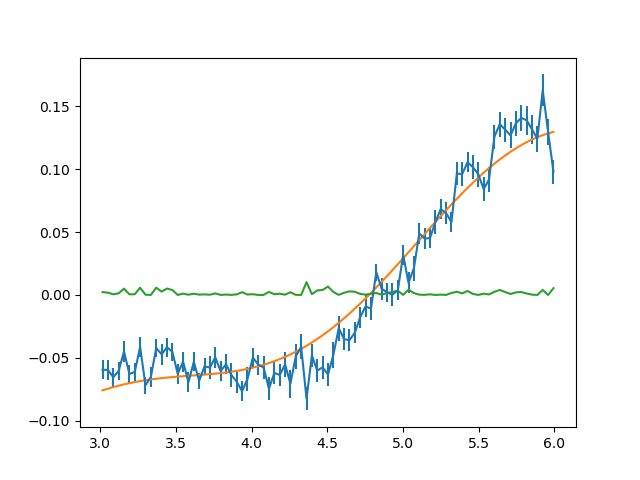

Prob -138.32694496596176


In [187]:
extraction = density_extraction(data_parameters, 1.03)
prob_calc, molecule = extraction.get_prob_function()

current_log_prob = prob_calc(molecule, 0)

debrog 0.002966216289309331
SCALE 0.13


<IPython.core.display.Javascript object>


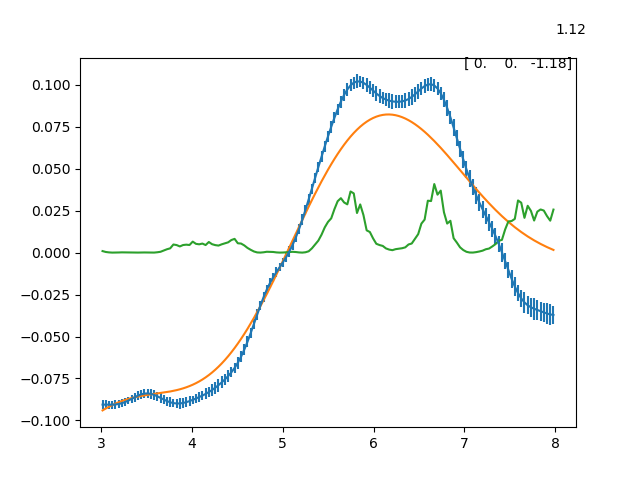

Prob -1291.9028901488612


In [13]:
extraction = density_extraction(data_parameters, 1.03)
prob_calc, molecule = extraction.get_prob_function()

current_log_prob = prob_calc(molecule, 0)